# **1)Выполним разведочный анализ данных:** [Датасет качества воздуха](https://www.kaggle.com/datasets/tawfikelmetwally/air-quality-dataset)


---


In [87]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('/content/Air Quality.csv')

# Вывод первых нескольких строк данных
print(data.head())

# Изучение структуры данных и информации о признаках
print(data.info())

# Описательная статистика данных
print(data.describe())

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18:00:00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19:00:00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20:00:00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21:00:00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

# **2)Построение графиков, необходимых для понимания структуры данных:**


---






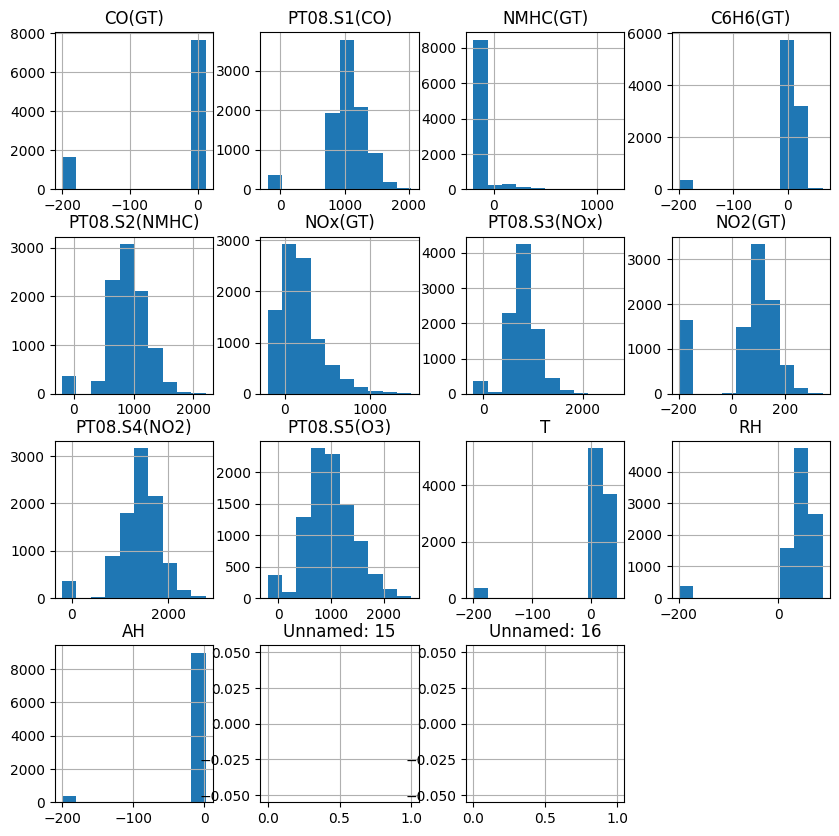

<ipython-input-88-f4dbac989fd4>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


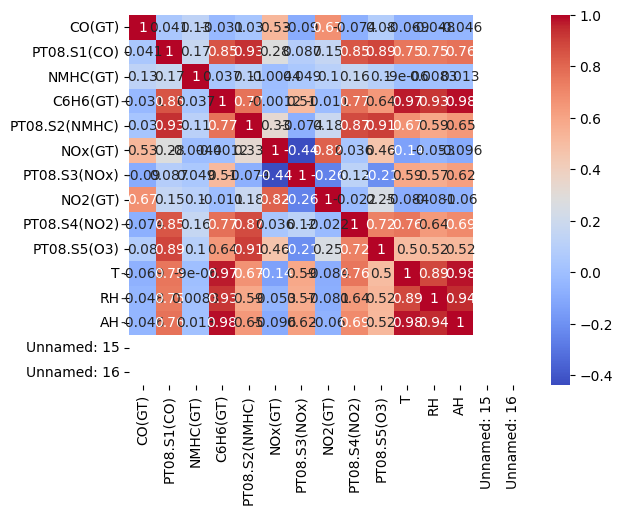

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение гистограмм распределения признаков
data.hist(figsize=(10, 10))
plt.show()

# Построение матрицы корреляции
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


# **4)Анализ и заполнение пропусков в данных:**

In [89]:
# Проверка наличия пропущенных значений
print(data.isnull().sum())

# Заполнение пропущенных значений средними значениями
data = data.fillna(data.mean())


Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


<ipython-input-89-e67d1ab172d0>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


# **5)Выбора признаков и целевой переменной для решения задачи регрессии::**

---



In [90]:
# Выбор признаков для обучения моделей (например, выбор колонок "NOx(GT)", "NO2(GT)")
features = ['NOx(GT)', 'NO2(GT)']
X = data[features]
y = data['CO(GT)']




# **6)Построение базового решения (baseline) без подбора гиперпараметров**: 

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Создание экземпляров моделей
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    BaggingRegressor()
]

# Обучение и оценка базовых моделей
results = {}
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R^2': r2}



In [99]:
# Вывод результатов
for model, scores in results.items():
    print(model)
    for metric, score in scores.items():
        print(metric, score)
    print()

LinearRegression
MSE 3065.1802651857647
MAE 35.578188983965575
R^2 0.45822654043467137

DecisionTreeRegressor
MSE 4656.431354231651
MAE 30.69546418692652
R^2 0.17697143210020616

RandomForestRegressor
MSE 3434.4462434570123
MAE 30.23369894044614
R^2 0.39295843571011446

GradientBoostingRegressor
MSE 2874.5232868594335
MAE 29.504617429920422
R^2 0.49192533848297093

BaggingRegressor
MSE 3543.3559597963513
MAE 30.30290881230709
R^2 0.37370854216499005



# **7)подбора гиперпараметров выбранных моделей с использованием метода кросс-валидации:**

In [103]:
from sklearn.model_selection import GridSearchCV

# Создание экземпляров моделей с указанием наборов гиперпараметров
models = [
    (LinearRegression(), {}),
    (DecisionTreeRegressor(), {'max_depth': [None, 5, 10]}),
    (RandomForestRegressor(), {'n_estimators': [100, 200, 300]}),
    (GradientBoostingRegressor(), {'learning_rate': [0.1, 0.05, 0.01]}),
    (BaggingRegressor(), {'n_estimators': [50, 100, 150]})
]

# Подбор гиперпараметров и оценка моделей
results = {}
for model, params in models:
    model_name = model.__class__.__name__
    grid_search = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R^2': r2}

# Вывод результатов с подобранными гиперпараметрами
for model, scores in results.items():
    print(model)
    for metric, score in scores.items():
        print(metric, score)
    print()


LinearRegression
MSE 3065.1802651857647
MAE 35.578188983965575
R^2 0.45822654043467137

DecisionTreeRegressor
MSE 2893.092189834623
MAE 29.64882892188026
R^2 0.4886432676307394

RandomForestRegressor
MSE 3429.8547302001684
MAE 30.1374142335162
R^2 0.39376998994398904

GradientBoostingRegressor
MSE 2857.387578167747
MAE 29.970585579213726
R^2 0.4949540909140896

BaggingRegressor
MSE 3429.9569832537754
MAE 30.217426352613387
R^2 0.39375191662176634



# **8)Повторное обучение моделей с оптимальными гиперпараметрами и сравнение с базовыми моделями:**

In [105]:
from sklearn.model_selection import GridSearchCV

# Создание экземпляров моделей с указанием наборов гиперпараметров
models = [
    (LinearRegression(), {}),
    (DecisionTreeRegressor(), {'max_depth': [None, 5, 10]}),
    (RandomForestRegressor(), {'n_estimators': [100, 200, 300]}),
    (GradientBoostingRegressor(), {'learning_rate': [0.1, 0.05, 0.01]}),
    (BaggingRegressor(), {'n_estimators': [50, 100, 150]})
]

# Подбор гиперпараметров и оценка моделей
results = {}
best_models = {}
for model, params in models:
    model_name = model.__class__.__name__
    grid_search = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R^2': r2}

# Вывод результатов с оптимальными гиперпараметрами
print("Модели с оптимальными гиперпараметрами:")
for model, scores in results.items():
    print(model)
    for metric, score in scores.items():
        print(metric, score)
    print()

# Обучение базовых моделей
baseline_results = {}
for model, _ in models:
    model_name = model.__class__.__name__
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    baseline_results[model_name] = {'MSE': mse, 'MAE': mae, 'R^2': r2}

# Вывод результатов базовых моделей
print("Базовые модели:")
for model, scores in baseline_results.items():
    print(model)
    for metric, score in scores.items():
        print(metric, score)
    print()


Модели с оптимальными гиперпараметрами:
LinearRegression
MSE 3065.1802651857647
MAE 35.578188983965575
R^2 0.45822654043467137

DecisionTreeRegressor
MSE 2893.092189834623
MAE 29.648828921880266
R^2 0.4886432676307394

RandomForestRegressor
MSE 3435.7576622827396
MAE 30.152675026611895
R^2 0.3927266412142987

GradientBoostingRegressor
MSE 2857.387578167747
MAE 29.970585579213726
R^2 0.4949540909140896

BaggingRegressor
MSE 3440.832870309249
MAE 30.276385599644577
R^2 0.39182959348051094

Базовые модели:
LinearRegression
MSE 3065.1802651857647
MAE 35.578188983965575
R^2 0.45822654043467137

DecisionTreeRegressor
MSE 4649.545075300538
MAE 30.623818632152886
R^2 0.1781885882989509

RandomForestRegressor
MSE 3445.012398759822
MAE 30.262984665862408
R^2 0.39109085794389764

GradientBoostingRegressor
MSE 2874.5232868594335
MAE 29.504617429920422
R^2 0.49192533848297093

BaggingRegressor
MSE 3607.739194476144
MAE 30.500146411587348
R^2 0.36232874562034423



# **9)Формирование выводов о качестве моделей на основе выбранных метрик и визуализация результатов:**

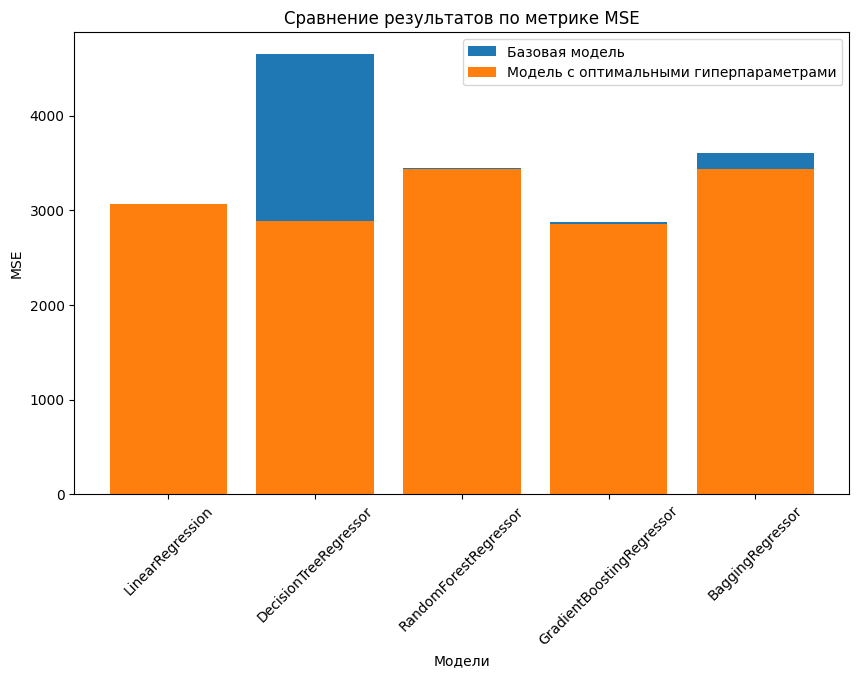

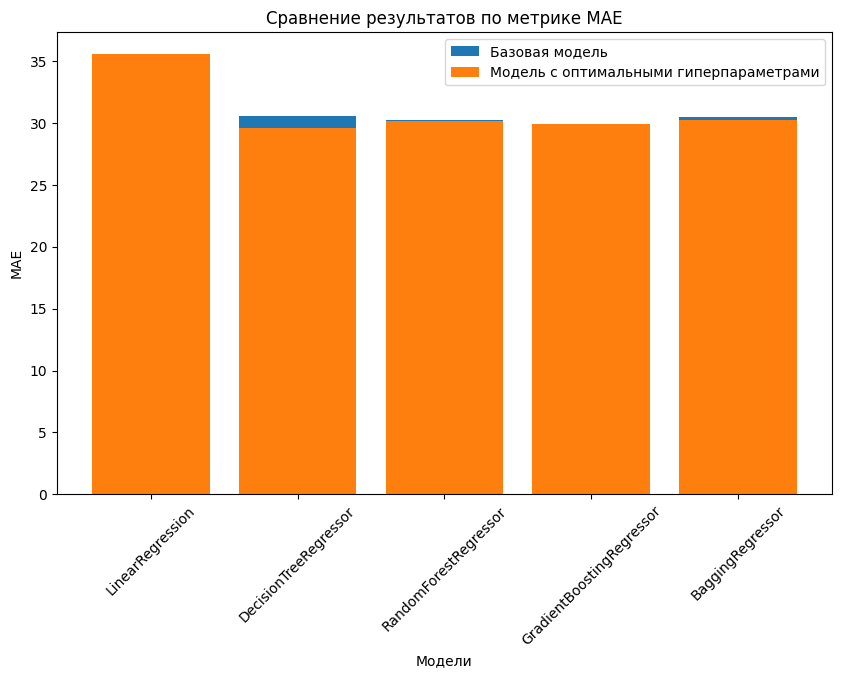

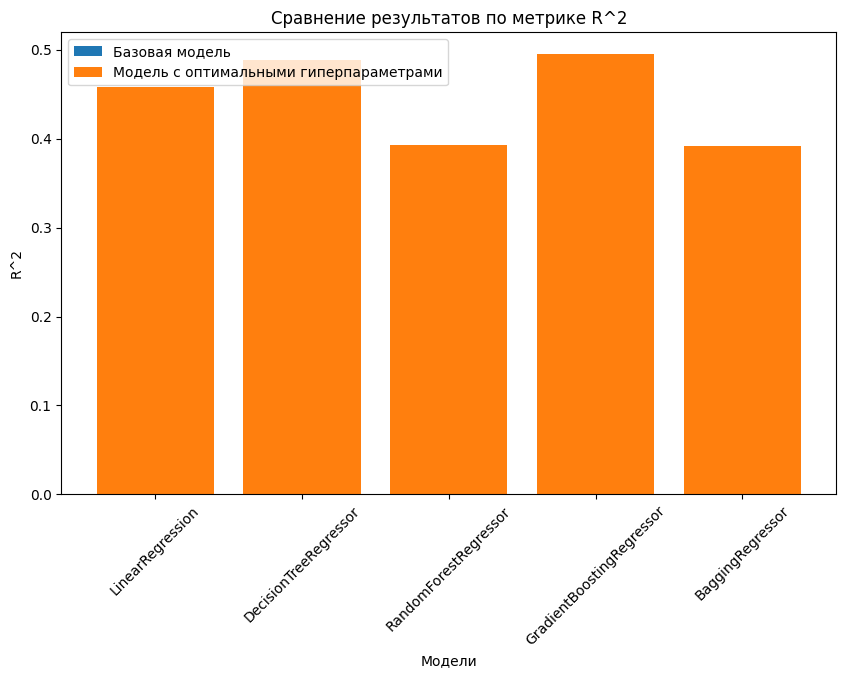

In [107]:
import matplotlib.pyplot as plt

# Визуализация результатов
metrics = ['MSE', 'MAE', 'R^2']

for metric in metrics:
    # Создание списков значений метрик для базовых моделей и моделей с оптимальными гиперпараметрами
    baseline_scores = [baseline_results[model][metric] for model in baseline_results]
    optimized_scores = [results[model][metric] for model in results]

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(baseline_scores)), baseline_scores, label='Базовая модель')
    plt.bar(range(len(optimized_scores)), optimized_scores, label='Модель с оптимальными гиперпараметрами')
    plt.xticks(range(len(baseline_scores)), baseline_results.keys(), rotation=45)
    plt.xlabel('Модели')
    plt.ylabel(metric)
    plt.title(f'Сравнение результатов по метрике {metric}')
    plt.legend()
    plt.show()


